In [37]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import scipy.stats


Populating the interactive namespace from numpy and matplotlib


In [38]:
df=pd.read_csv('/Users/mariaortiz/Desktop/Citibike/201410-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [39]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

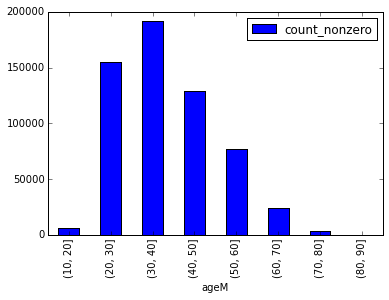

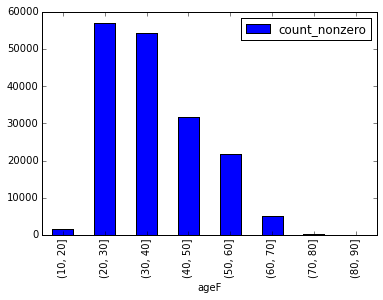

In [40]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001968
(20, 30]       0.065516
(30, 40]       0.053657
(40, 50]       0.018060
(50, 60]       0.013701
(60, 70]       0.003284
(70, 80]       0.000065
(80, 90]       0.000000


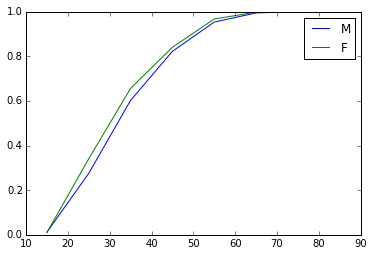

In [41]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [42]:
#first time running ks test, we get nan values, so we need to remove them, using 
#ks = scipy.stats.ks_2samp(df.ageF[~np.isnan(df.ageF)], df.ageM[~np.isnan(df.ageM)])
#print ks

ksb= scipy.stats.ks_2samp(df.ageF, df.ageM)
print ksb


(0.50092372371067839, 0.0)


##KS Test interpretation

Ho --> data follows a normal distribution

Ha --> data does not follow a normal distribution

The KS test returns a 0 p value. At a 95% confidence level, with alpha of 0.05 (and a critical value of 1.38), we reject the Ho, which means the data is not normally distributed.

In [46]:
#pearson = scipy.stats.pearsonr(df.ageM, df.ageF)
#getting rid of nans and making the two sets the same lenght

ageFem = df.ageF[~isnan(df.ageF)]
ageMale = np.random.choice(df.ageF[~np.isnan(df.ageM)], len('ageFem'), replace=False)

pearson = scipy.stats.pearsonr(ageFem, ageMale)#[~np.isnan(df.ageF)], df.ageM[~np.isnan(df.ageM)])
print pearson


ValueError: operands could not be broadcast together with shapes (172111,) (6,) 

###Pearson interpretation:
If we were to get a positive correlation coefficient, then our results are statistically significant, and we are not getting our results by chance.

In [11]:
spearman = scipy.stats.spearmanr(df.ageF,df.ageM, axis=0)
print spearman

(-0.43587403520303125, 0.0)


###Spearman interpretation: 
Negative correlation between distributions, which means there is no statistical significance.

#Comparing age distribution between riders during the day and night..
I initially wanted to count day as 00:06:00 - 17:59:59 and so on, but was having trouble with the dataframes, so opted for 6am-6pm because that's what Google says are sunrise and sunset in NYC

In [12]:
df['mystart'] = pd.DatetimeIndex(df['starttime']).hour

In [14]:
df.head(10)
#I see the column hour has been added and all the hours are '0'...interesting...

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF,mystart
0,1027,10/1/2014 00:00:27,10/1/2014 00:17:34,479,9 Ave & W 45 St,40.760193,-73.991255,540,Lexington Ave & E 26 St,40.741473,-73.983209,21376,Subscriber,1977,1,38,NaN,0
1,534,10/1/2014 00:00:36,10/1/2014 00:09:30,417,Barclay St & Church St,40.712912,-74.010202,417,Barclay St & Church St,40.712912,-74.010202,16086,Subscriber,1974,2,NaN,41,0
2,416,10/1/2014 00:00:42,10/1/2014 00:07:38,327,Vesey Pl & River Terrace,40.715338,-74.016584,415,Pearl St & Hanover Square,40.704718,-74.009260,16073,Subscriber,1990,1,25,NaN,0
3,428,10/1/2014 00:00:50,10/1/2014 00:07:58,515,W 43 St & 10 Ave,40.760094,-73.994618,447,8 Ave & W 52 St,40.763707,-73.985162,18635,Subscriber,1966,1,49,NaN,0
4,281,10/1/2014 00:01:08,10/1/2014 00:05:49,497,E 17 St & Broadway,40.737050,-73.990093,537,Lexington Ave & E 24 St,40.740259,-73.984092,20203,Subscriber,1979,1,36,NaN,0
5,656,10/1/2014 00:01:29,10/1/2014 00:12:25,509,9 Ave & W 22 St,40.745497,-74.001971,382,University Pl & E 14 St,40.734927,-73.992005,15334,Subscriber,1985,1,30,NaN,0
6,429,10/1/2014 00:03:12,10/1/2014 00:10:21,504,1 Ave & E 15 St,40.732219,-73.981656,536,1 Ave & E 30 St,40.741444,-73.975361,20836,Subscriber,1969,1,46,NaN,0
7,840,10/1/2014 00:03:42,10/1/2014 00:17:42,347,W Houston St & Hudson St,40.728739,-74.007488,432,E 7 St & Avenue A,40.726218,-73.983799,17344,Subscriber,1984,2,NaN,31,0
8,883,10/1/2014 00:03:45,10/1/2014 00:18:28,268,Howard St & Centre St,40.719105,-73.999733,119,Park Ave & St Edwards St,40.696089,-73.978034,19209,Subscriber,1980,1,35,NaN,0
9,2470,10/1/2014 00:04:42,10/1/2014 00:45:52,503,E 20 St & Park Ave,40.738274,-73.987520,507,E 25 St & 2 Ave,40.739126,-73.979738,19950,Subscriber,1968,1,47,NaN,0


In [16]:
df['day'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['mystart']>6) & (df['mystart'] <= 18)]
df['night'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['mystart'] <= 6) | (df['mystart'] > 18)]

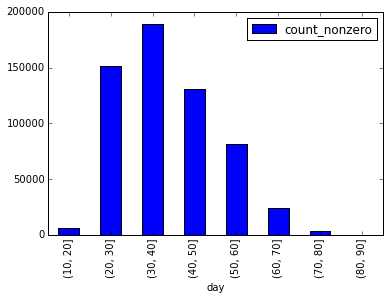

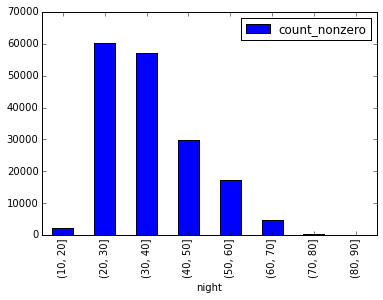

In [17]:
#again, binning ages
bins = np.arange(10, 99, 10)
df.day.groupby(pd.cut(df.day, bins)).agg([count_nonzero]).plot(kind='bar')
df.night.groupby(pd.cut(df.night, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
day                    
(10, 20]       0.000925
(20, 30]       0.093721
(30, 40]       0.105507
(40, 50]       0.055715
(50, 60]       0.018546
(60, 70]       0.003160
(70, 80]       0.000238
(80, 90]       0.000000


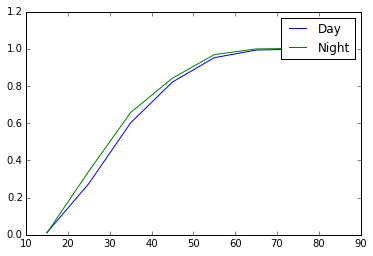

In [31]:
#cumulative sum 

csDay=df.day.groupby(pd.cut(df.day, bins)).agg([count_nonzero]).cumsum()

csNight=df.night.groupby(pd.cut(df.night, bins)).agg([count_nonzero]).cumsum()

print np.abs(csDay / csDay.max()-csNight / csNight.max())

pl.plot(bins[:-1] + 5, csM / csDay.max(), label = "Day")
pl.plot(bins[:-1] + 5, csF / csNight.max(), label = "Night")
pl.legend()

As with the ages above, we see the distributions behave similarly.

In [30]:
#ks2 = scipy.stats.ks_2samp(df.day[~np.isnan(df.day)], df.night[~np.isnan(df.night)])
#print ks2
ks22 = scipy.stats.ks_2samp(df.day, df.night)
print ks22

(0.50199647404221737, 0.0)


###KS Interpretation: 

Ho --> data follows a normal distribution

Ha --> data does not follow a normal distribution

The KS test returns a 0 p value. At a 95% confidence level, with alpha of 0.05 (and a critical value of 1.38), we reject the Ho, which means the data is not normally distributed.

In [22]:
spearman2 = scipy.stats.spearmanr(df.day,df.night, axis=0)
print spearman2

(-0.42402510275412336, 0.0)


###Spearman Interpretation:
Again, negative correlation between distributions, which means there is no statistical significance.

In [34]:
pearson = scipy.stats.pearsonr(df.day, df.night)
print pearson

(nan, 1.0)


###Pearson Interpretation:
Again with the nans! I give up. 